<a href="https://colab.research.google.com/github/cres17/2025_NLP/blob/main/%5B%EC%A7%80%EB%8A%A5%ED%98%95_%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4%5D_MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
class Encoder(nn.Module) :
    def __init__(self):
      super(Encoder,self).__init__()
      self.layer1 =  nn.Sequential(
        nn.Conv2d(1,16,3,padding=1), # 16 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16,32,3,padding=1), # 32 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32,64,3,padding=1), # 64 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2) # 64 x 14 x 14
    )
      self.layer2 = nn.Sequential (
        nn.Conv2d(64,128,3,padding=1), # 128 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Conv2d(128,256,3,padding=1), # 256 x 7 x 7
        nn.ReLU()
    )

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out

In [3]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256,128,3,2,1,1), # 128 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128,64,3,1,1), # 64 x 14 x 14
            nn.ReLU(), nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64,16,3,1,1), # 16 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,1,3,2,1,1), # 1 x 28 x 28
            nn.ReLU()
        )
    def forward(self,x):
        out = x.view(batch_size, 256, 7, 7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out


In [4]:
mnist_train = dset.MNIST("./data/MNIST", train=True,
    transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False,
    transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 513kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.64MB/s]


In [5]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
    shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
    shuffle=False, num_workers=2, drop_last=True)

In [6]:
num_epoch = 10
Learning_rate = 0.0002

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)
parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=Learning_rate)

In [7]:
for i in range(1):
    for j,[image, label] in enumerate(test_loader):
      image = image.to(device)
      z = encoder(image)
      output = decoder(z)
      loss = loss_func(output,image)

#    if j % 10 == 0:
#      print(loss)
    print("loss is", loss.cpu().item())

loss is 0.5187029838562012


torch.Size([100, 28, 28])


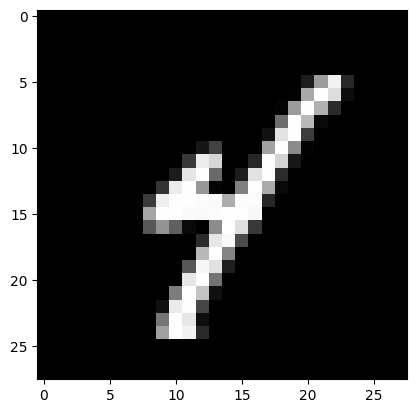

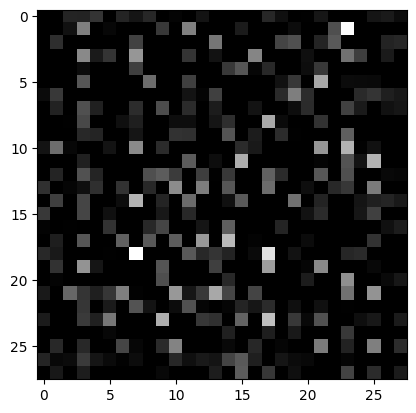

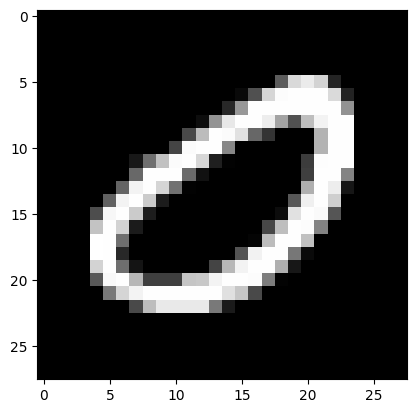

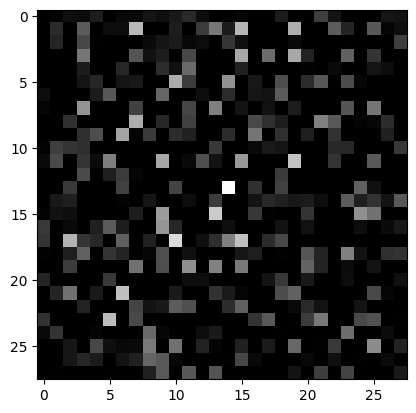

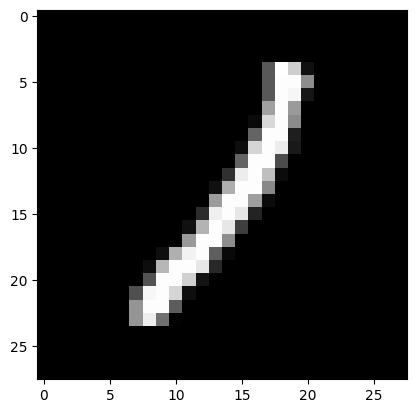

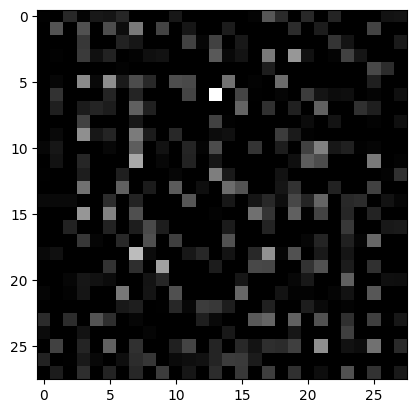

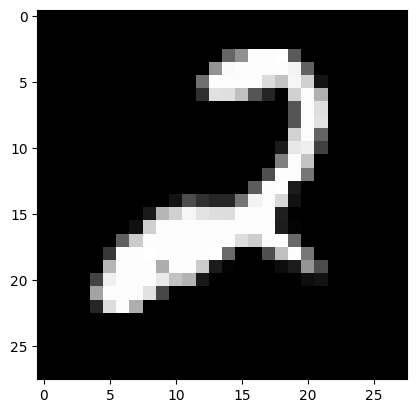

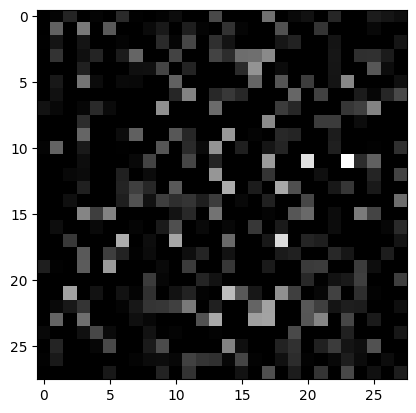

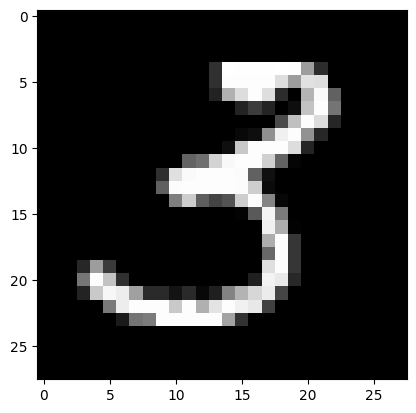

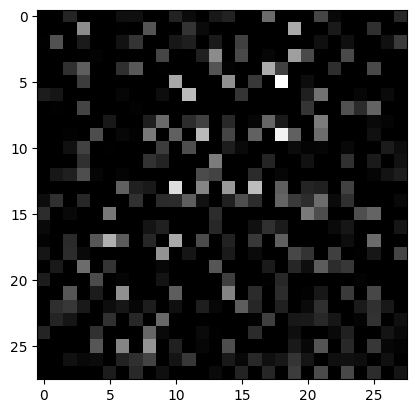

In [8]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()

In [9]:
for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
    optimizer.zero_grad()

    image = image.to(device)
    z = encoder(image)
    output = decoder(z)
    loss = loss_func(output, image)

    loss.backward()
    optimizer.step()
  print("loss is", loss.cpu().item())

loss is 0.004008189775049686
loss is 0.002683634404093027
loss is 0.0021654735319316387
loss is 0.0018320338567718863
loss is 0.0013693877262994647
loss is 0.001295152003876865
loss is 0.0011001762468367815
loss is 0.0010086431866511703
loss is 0.0008571298676542938
loss is 0.0006994724390096962


torch.Size([100, 28, 28])


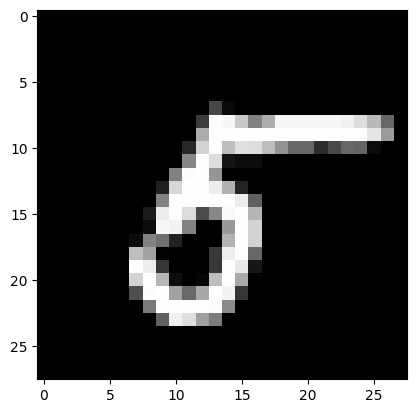

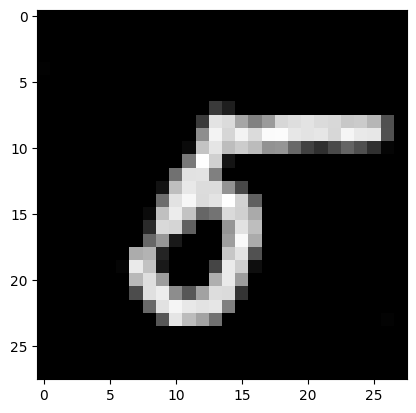

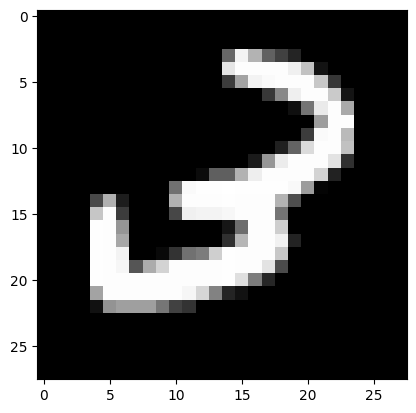

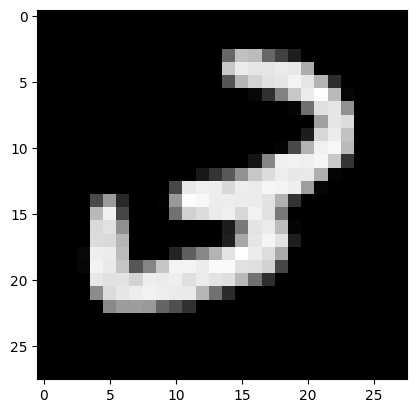

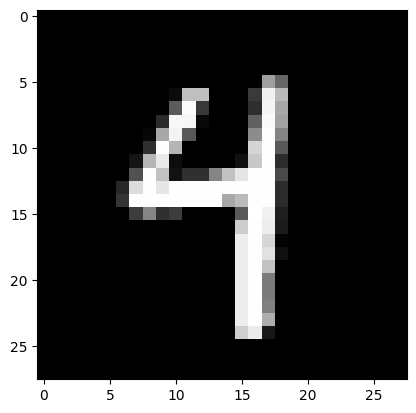

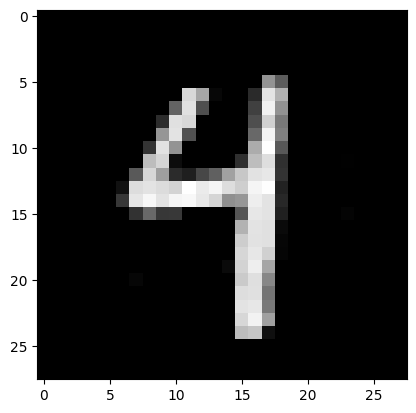

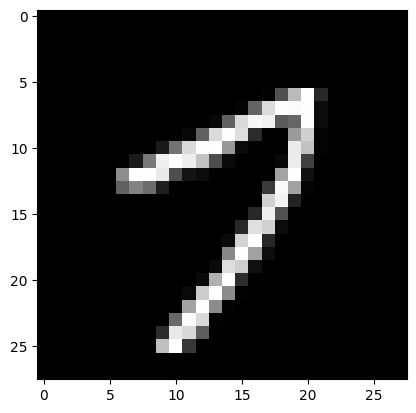

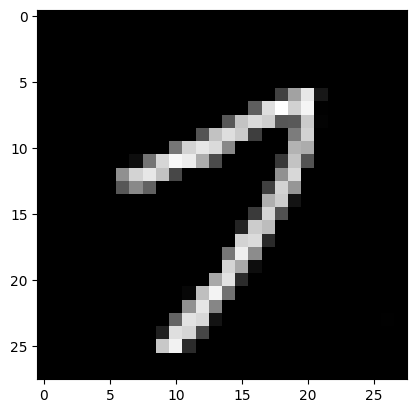

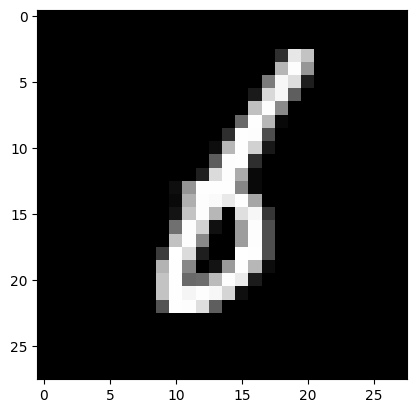

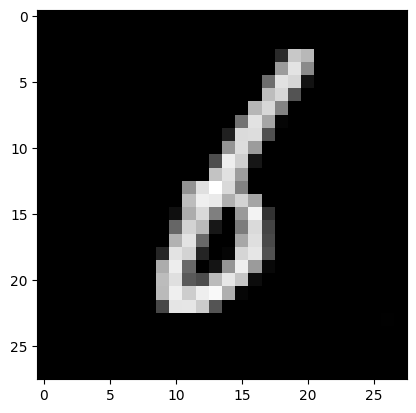

In [10]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()

깃헙으로 저장해서 ctrl+p로 pdf로 저장하고 ipynb와 함께 압축해서 올리기